In [1]:
# For interactive plots, comment the next line
%pylab inline
# For interactive plots, uncomment the next line
# %pylab ipympl
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


# Introduction
For instructions on using Jupyter notebooks, see the [README.md](../../README.md) file. 

This notebook demonstrates how to retrieve SMAP data via OpenDAP from NSIDC. Specifically, we will:
* Retrieve data for a specified date and region
* Retrieve data for specified points over a date range

# How to retrieve SMAP data via OpenDAP using PODPAC
* Make sure you have PODPAC properly installed WITH the **datatype** optional dependencies: `pip install podpac[datatype]`

# Setup

In [2]:
import podpac

## Provide Earth Data Login Credentials
If you do not have an earth data login, or have not activated OpenDAP access, follow the [instructions here](https://creare-com.github.io/podpac-docs/user/earthdata.html).

In [3]:
import getpass
username = password = None
username = input("Username:");   password = getpass.getpass('Password:')

Username:mpuecker
Password:········


## Create the PODPAC SMAP Node

In [4]:
# Create the SMAP node
product = 'SPL4SMAU'   # Level 4 soil moisture analysis update
sm = podpac.datalib.SMAP(product=product, interpolation='nearest', username=username, password=password)

##  Retrieve data for a specified date and region
Note, this example:
* Retrieves data from NSIDC via OpenDAP
* Does not download the whole file, only the data it needs
* Caches it locally
* Automatically does nearest-neighbor interpolation to the user's specified grid
* Accesses a single SMAP file

In [5]:
# dim = (start, stop, step)
lat =   (   90,  -90,-2.0)
lon =   ( -180,  180, 2.0)
# dim = value
time = '2018-05-19T12:00:00'

# Create the PODPAC Coordinates
c_world = podpac.Coordinates([podpac.crange(*lat),
                              podpac.crange(*lon),
                              time], dims=['lat', 'lon', 'time'])

# Evaluate the node to retrieve and interpolate the data
o = sm.eval(c_world)

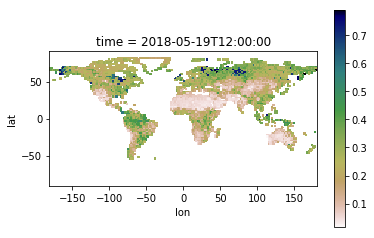

In [6]:
# Plot the result
figure()
o.plot(cmap='gist_earth_r')
_ = axis('scaled')

## Retrieve data for specified points over a date range
Note, this example:
* Retrieves data from NSIDC via OpenDAP
* Does not download the whole file, only the data it needs
* Caches it locally
* Accesses multiple (24) SMAP files in parallel

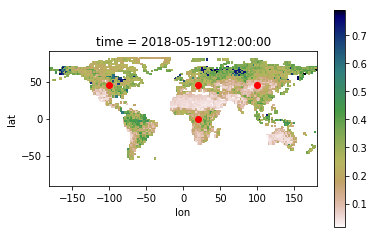

In [7]:
# Look at a list of points
lat_lon_pts = [
    (  45.0, 45.0,  0.0, 45.0),  # Lat
    (-100.0, 20.0, 20.0, 100.0), # Lon
]

# Turn the list into a numpy array
lat_lon_pts = np.array(lat_lon_pts)

# Let's plot the points
figure()
o.plot(cmap='gist_earth_r')
axis('scaled')
_ = plot(lat_lon_pts[1], lat_lon_pts[0], 'ro')

In [8]:
# Create the PODPAC coordinates
c_pts = podpac.Coordinates([lat_lon_pts,
                            podpac.crange('2018-05-15T00', '2018-05-19T00', '3,h')], 
                            dims=['lat_lon', 'time']
                            )

# To improve the speed of data retrieval, make 6 requests in parallel
sm.threaded = True; sm.n_threads = 6

# Evaluate the node to retrieve and interpolate the data
ot = sm.eval(c_pts)

# Turn of parallel retrieval of data
sm.threaded = False

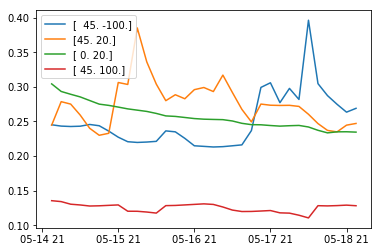

In [9]:
# Plot the results
figure()
plot(ot.time, ot.data.T)
legend([str(llp) for llp in lat_lon_pts.T])
locs, labels = xticks()
_ = xticks(locs[::2])